In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from sklearn.linear_model import LinearRegression

In [2]:
def mat(file):
    with open(file,'r',encoding="utf8") as f:
        l = [[int(num) for num in line.split()] for line in f]
    l = np.array(l)
    return l 

# IMPORTING DATA

In [3]:
p1 = mat("pulse ML 1.dat")
p2 = mat("pulse ML 2.dat")
p3 = mat("pulse ML 3.dat")
p4 = mat("pulse ML 4.dat")
p5 = mat("pulse ML 5.dat")
p6 = mat("pulse ML 6.dat")

In [4]:
p7 = mat("pulse ML 7.dat")
p8 = mat("pulse ML 8.dat")
p9 = mat("pulse ML 9.dat")
p10 = mat("pulse ML 10.dat")
p11 = mat("pulse ML 11.dat")
p12 = mat("pulse ML 12.dat")

In [5]:
p1_t = p1[:,0]*2
p2_t = p2[:,0]*2
p3_t = p3[:,0]*2
p4_t = p4[:,0]*2
p5_t = p5[:,0]*2
p6_t = p6[:,0]*2

In [6]:
p7_t = p7[:,0]*2
p8_t = p8[:,0]*2
p9_t = p9[:,0]*2
p10_t = p10[:,0]*2
p11_t = p11[:,0]*2
p12_t = p12[:,0]*2

In [7]:
p1_q = p1[:,1]-p1[:,2]
p2_q = p2[:,1]-p2[:,2]
p3_q = p3[:,1]-p3[:,2]
p4_q = p4[:,1]-p4[:,2]
p5_q = p5[:,1]-p5[:,2]
p6_q = p6[:,1]-p6[:,2]
p7_q = p7[:,1]-p7[:,2]
p8_q = p8[:,1]-p8[:,2]
p9_q = p9[:,1]-p9[:,2]
p10_q = p10[:,1]-p10[:,2]
p11_q = p11[:,1]-p11[:,2]
p12_q = p12[:,1]-p12[:,2]

In [8]:
tlist,qlist=[],[]
for i in range(int(len(p1_t)/496)):
    tlist.append(p1_t[496*i:496*(i+1)])
    qlist.append(p1_q[496*i:496*(i+1)])
for i in range(int(len(p2_t)/496)):
    tlist.append(p2_t[496*i:496*(i+1)])
    qlist.append(p2_q[496*i:496*(i+1)])
for i in range(int(len(p3_t)/496)):
    tlist.append(p3_t[496*i:496*(i+1)])
    qlist.append(p3_q[496*i:496*(i+1)])
for i in range(int(len(p4_t)/496)):
    tlist.append(p4_t[496*i:496*(i+1)])
    qlist.append(p4_q[496*i:496*(i+1)])
for i in range(int(len(p5_t)/496)):
    tlist.append(p5_t[496*i:496*(i+1)])
    qlist.append(p5_q[496*i:496*(i+1)])
for i in range(int(len(p6_t)/496)):
    tlist.append(p6_t[496*i:496*(i+1)])
    qlist.append(p6_q[496*i:496*(i+1)]) 
for i in range(int(len(p7_t)/496)):
    tlist.append(p7_t[496*i:496*(i+1)])
    qlist.append(p7_q[496*i:496*(i+1)])
for i in range(int(len(p8_t)/496)):
    tlist.append(p8_t[496*i:496*(i+1)])
    qlist.append(p8_q[496*i:496*(i+1)])
for i in range(int(len(p9_t)/496)):
    tlist.append(p9_t[496*i:496*(i+1)])
    qlist.append(p9_q[496*i:496*(i+1)])
for i in range(int(len(p10_t)/496)):
    tlist.append(p10_t[496*i:496*(i+1)])
    qlist.append(p10_q[496*i:496*(i+1)])
for i in range(int(len(p11_t)/496)):
    tlist.append(p11_t[496*i:496*(i+1)])
    qlist.append(p11_q[496*i:496*(i+1)])
for i in range(int(len(p12_t)/496)):
    tlist.append(p12_t[496*i:496*(i+1)])
    qlist.append(p12_q[496*i:496*(i+1)])

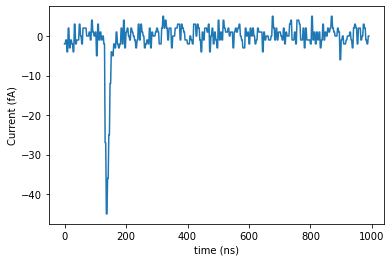

In [152]:
plt.plot(tlist[0],qlist[0])
plt.xlabel("time (ns)")
plt.ylabel("Current (fA)")
plt.show()

# PSD CALCULATION

In [9]:
def psdcal(sg,lg,t,q):
    i,j=0,0
    while t[i] <= sg:
        i+=1
    while t[j] <= lg:
        j+=1
    sqsum = simpson(q[:i+1],dx=5)
    lqsum = simpson(q[:j+1],dx=5)
    return sqsum,lqsum

## USING PARAMETERS AS OBSERVED IN THE PULSE

In [10]:
psd=[]
xaxis=[]
for i in range(len(tlist)):
    sqsum,lqsum = psdcal(155,405,tlist[i],qlist[i])
    lqsum*=-1
    sqsum*=-1
    psd.append((lqsum-sqsum)/lqsum)
    xaxis.append(lqsum/5)


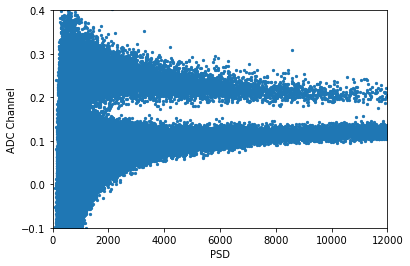

In [155]:
plt.scatter(xaxis,psd,s=5)
plt.ylim(-0.1,0.4) #0.175
plt.xlim(0,12000)
plt.xlabel("PSD")
plt.ylabel("ADC Channel")
plt.show()

## USING PARAMETERS AS FIXED IN SOFTWARE

In [12]:
psd1=[]
xaxis1=[]
for i in range(len(tlist)):
    sqsum,lqsum = psdcal(166,416,tlist[i],qlist[i])
    lqsum*=-1
    sqsum*=-1
    psd1.append((lqsum-sqsum)/lqsum)
    xaxis1.append(lqsum/5)

<ipython-input-12-d8ff240b3a48>:7: RuntimeWarning: divide by zero encountered in double_scalars
  psd1.append((lqsum-sqsum)/lqsum)


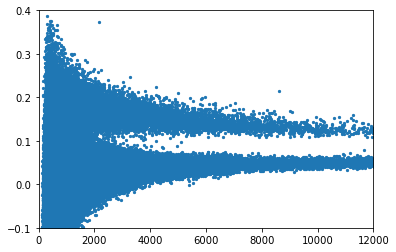

In [15]:
plt.scatter(xaxis1,psd1,s=5)
plt.ylim(-0.1,0.4)
plt.xlim(0,12000)
plt.show()

In [16]:
psd_n, psd_g, adc_n, adc_g,pulse_n,t_n,pulse_g,t_g = [],[],[],[],[],[],[],[]
for i in range(0,len(xaxis)):
    if xaxis[i]>=2000:
        if psd[i]>=0.17:
            psd_n.append(psd[i])
            adc_n.append(xaxis[i])
            pulse_n.append(qlist[i])
            t_n.append(tlist[i])
        else:
            psd_g.append(psd[i])
            adc_g.append(xaxis[i])
            pulse_g.append(qlist[i])
            t_g.append(tlist[i])

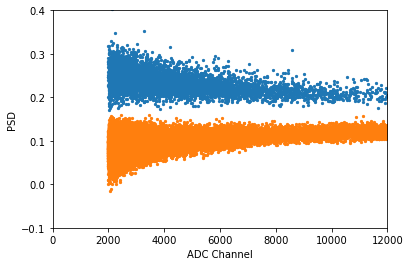

In [160]:
plt.scatter(adc_n,psd_n,s=5)
plt.scatter(adc_g,psd_g,s=5)
plt.xlim(0,12000)
plt.ylim(-0.1,0.4)
plt.xlabel("ADC Channel")
plt.ylabel("PSD")
plt.show()

In [126]:
psdtemp_n=[]
adctemp_n=[]
pulsetemp_n=[]
ttemp_n=[]

i = 2000
while i <= 12000:
    plist=[]
    alist=[]
    pulselist=[]
    tlist=[]
    for j in range(len(psd_n)):
        if adc_n[j]>=i and adc_n[j]<=i+100:
            plist.append(psd_n[j])
            alist.append(adc_n[j])
            pulselist.append(pulse_n[j].tolist())
            tlist.append(t_n[j])
    pulsetemp_n.append(pulselist)
    ttemp_n.append(tlist)
    psdtemp_n.append(plist)
    adctemp_n.append(alist)
    i+=1000

In [166]:
psdtemp_g=[]
adctemp_g=[]
pulsetemp_g=[]
ttemp_g=[]

i = 2000
while i <= 12000:
    plist=[]
    alist=[]
    pulselist=[]
    tlist=[]
    for j in range(len(psd_g)):
        if adc_g[j]>=i and adc_g[j]<=i+100:
            plist.append(psd_g[j])
            alist.append(adc_g[j])
            pulselist.append(pulse_g[j].tolist())
            tlist.append(t_g[j])
    pulsetemp_g.append(pulselist)
    ttemp_g.append(tlist)
    psdtemp_g.append(plist)
    adctemp_g.append(alist)
    i+=1000

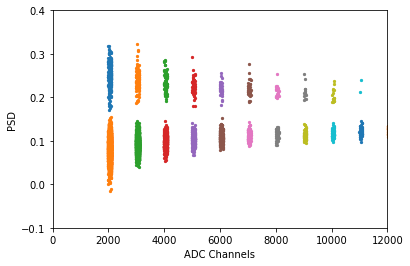

In [161]:
for i in range(len(adctemp_n)):
    plt.scatter(adctemp_n[i],psdtemp_n[i],s=5)
for j in range(len(adctemp_g)):
    plt.scatter(adctemp_g[j],psdtemp_g[j],s=5)
plt.xlim(0,12000)
plt.ylim(-0.1,0.4)
plt.xlabel("ADC Channels")
plt.ylabel("PSD")
plt.show()

In [179]:
normalised_n=[]
for i in range(len(pulsetemp_n)):
    nlist=[]
    for j in range(len(pulsetemp_n[i])):
        s=0
        for k in range(len(pulsetemp_n[i][j])):
            s+=pulsetemp_n[i][j][k]
        nlist.append(pulsetemp_n[i][j]/s)
    normalised_n.append(nlist)


for i in range(len(pulsetemp_n)):
    pulsetemp_n[i]=np.array(pulsetemp_n[i])
    normalised_n[i]=np.array(normalised_n[i])

pulseavg_n=[]
for i in range(len(pulsetemp_n)):
    avg = np.average(pulsetemp_n[i], axis=0)
    pulseavg_n.append(avg)

npulseavg_n=[]
for i in range(len(normalised_n)):
    avg = np.average(normalised_n[i], axis=0)
    npulseavg_n.append(avg)

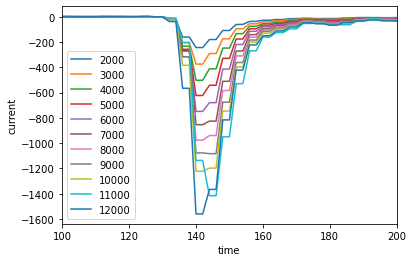

In [199]:
leglist=[]
for j in range(len(pulsetemp_n)):
    plt.plot(tlist[0], pulseavg_n[j])
    leg = 2000+(j*1000)
    leglist.append(leg)
    plt.xlim(100,200)
plt.legend(leglist)
plt.xlabel("time")
plt.ylabel("current")
plt.show()

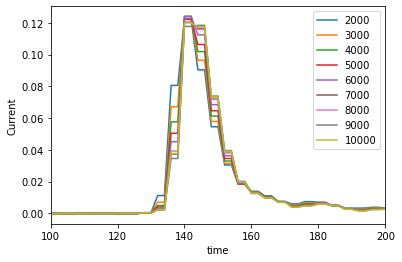

In [181]:
leglist=[]
for j in range(len(normalised_n)-2):
    plt.plot(tlist[0], npulseavg_n[j])
    leg = 2000+(j*1000)
    leglist.append(leg)
    plt.xlim(100,200)
plt.xlabel("time")
plt.ylabel("Current")
plt.legend(leglist)
plt.show()

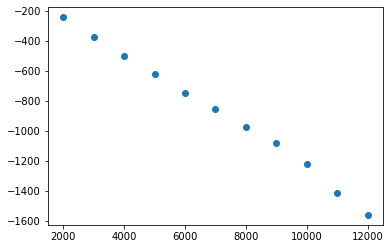

In [188]:
height=[]
for j in range(len(pulseavg_n)):
    height.append(min(pulseavg_n[j]))
adclist=[2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000]
plt.scatter(adclist,height)
plt.show()

In [170]:
normalised_g=[]
for i in range(len(pulsetemp_g)):
    glist=[]
    for j in range(len(pulsetemp_g[i])):
        s=0
        for k in range(len(pulsetemp_g[i][j])):
            s+=pulsetemp_g[i][j][k]
        glist2=[]
        for k in range(len(pulsetemp_g[i][j])):
            glist2.append(pulsetemp_g[i][j][k]/s)
        glist.append(glist2)
    normalised_g.append(nlist)


for i in range(len(pulsetemp_g)):
    pulsetemp_g[i]=np.array(pulsetemp_g[i])
    normalised_g[i]=np.array(normalised_g[i])

pulseavg_g=[]
for i in range(len(pulsetemp_g)):
    avg = np.average(pulsetemp_g[i], axis=0)
    pulseavg_g.append(avg)

npulseavg_g=[]
for i in range(len(normalised_g)):
    avg = np.average(normalised_g[i], axis=0)
    npulseavg_g.append(avg)

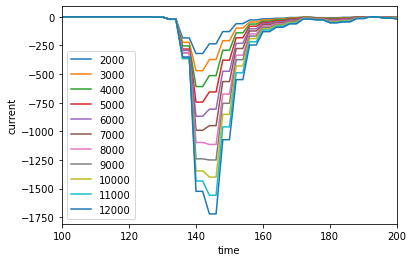

In [198]:
leglist=[]
for j in range(len(pulsetemp_g)):
    plt.plot(tlist[0], pulseavg_g[j])
    leg = 2000+(j*1000)
    leglist.append(leg)
    plt.xlim(100,200)
plt.xlabel("time")
plt.ylabel("current")
plt.legend(leglist)
plt.show()

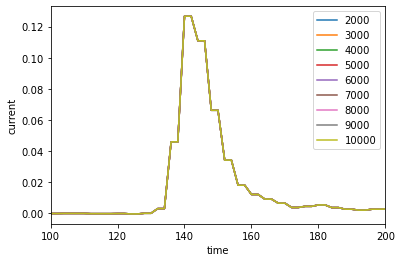

In [197]:
leglist=[]
for j in range(len(normalised_g)-2):
    plt.plot(tlist[0], npulseavg_g[j])
    leg = 2000+(j*1000)
    leglist.append(leg)
    plt.xlim(100,200)
plt.legend(leglist)
plt.xlabel("time")
plt.ylabel("current")
plt.show()

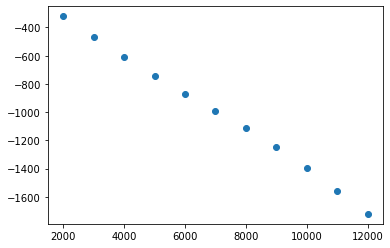

In [189]:
height=[]
for j in range(len(pulseavg_g)):
    height.append(min(pulseavg_g[j]))
adclist=[2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000]
plt.scatter(adclist,height)
plt.show()

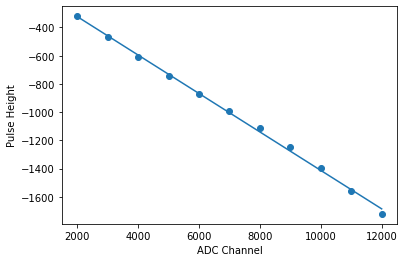

In [200]:
a,b = np.polyfit(adclist,height,1)
ylist=[]
for i in range(len(adclist)):
    ylist.append(a*adclist[i]+b)
plt.scatter(adclist,height)
plt.plot(adclist, ylist)
plt.xlabel("ADC Channel")
plt.ylabel("Pulse Height")
plt.show()